<a href="https://colab.research.google.com/github/CodeItD5/AIML-BOT-JAVA/blob/main/DataScraping_of_Country_Activity_Tracker_(CAT)_Artificial_Intelligence_(raw_code).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using requests and BeautifulSoup 4

In [2]:
!pip install requests
!pip install beautifulsoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import requests
from bs4 import BeautifulSoup
import io
from google.colab import files
import matplotlib.pyplot as plt
import time
import pandas as pd
import json

In [24]:
url = "https://cat.eto.tech/?expanded=Summary-metrics"
response = requests.get(url)
html_content = response.text

In [25]:
soup = BeautifulSoup(html_content, 'html.parser')

In [26]:
# get all the dropdown boxes
dropdown_list =  soup.find(id = "dashboard") #contains dynamic metrics data
type(dropdown_list)

NoneType

####Since we couldn't fetch data directly by parsing html, let's check if we have some API fetching data for us

In [14]:
url_ = "https://us-east1-gcp-cset-projects.cloudfunctions.net/cat-collab-eto?graph_type=Co-authorship+counts&selection_type=Top+10+Countries&countries=Australia%2CIndia%2CJapan%2CUnited+States&data_type=All&dataset=Research&aggregate=false&version=2"
response_co_authorship = requests.get(url_)

response_co_authorship.text

'{"result":{"graph_data":[{"graph_data":[{"collab":"China (mainland)","value":64325,"year_counts":[2101,2294,2481,2809,3286,3587,4167,5105,6783,8529,9555,9611]},{"collab":"United Kingdom","value":23218,"year_counts":[925,952,1021,1123,1310,1444,1673,1881,2385,2915,3105,3270]},{"collab":"Germany","value":20801,"year_counts":[976,1014,1061,1125,1184,1316,1515,1677,2016,2350,2638,2770]},{"collab":"Australia","value":20275,"year_counts":[774,840,908,1028,1318,1525,1631,1811,2133,2399,2402,2492]},{"collab":"Canada","value":16357,"year_counts":[659,707,724,734,867,1005,1060,1368,1568,1916,2384,2405]},{"collab":"Italy","value":13815,"year_counts":[563,607,663,713,948,959,1059,1209,1341,1544,1738,1720]},{"collab":"France","value":12288,"year_counts":[612,703,699,827,871,920,927,1063,1232,1344,1334,1292]},{"collab":"India","value":10785,"year_counts":[270,342,389,416,499,553,757,898,1148,1372,1558,1822]},{"collab":"Japan","value":10084,"year_counts":[548,513,576,579,549,655,754,843,1005,1181,12

#####Above we can see that an API is fetching data for the website, on further analysis we found out that, this data is used to populate rest of the data on the webpage after some calculations has been performed on it.<br> Therefore I decided to experiment with selenium to scrap this data, without getting into the calculations.

**EXPERIMENTING WITH SELENIUM**

In [29]:
!pip install selenium
!pip install cairosvg #to download svg content as image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#####Updating the chrome and then downloading relevant chrome driver.

In [28]:
!apt-get update
!apt-get upgrade -y
!apt-get install -y google-chrome-stable
!apt-get install -y wget curl unzip
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!dpkg -i google-chrome-stable_current_amd64.deb
!apt-get install -fy

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease
Get:4 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:6 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:8 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1,346 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:11 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,202 kB]
Get:12 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1,051 kB]
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu fo

In [30]:
!google-chrome-stable --version

Google Chrome 113.0.5672.126 


In [31]:
#Uploading the relevant linux based chrome driver (colab runs on linux)
files.upload()

Saving chromedriver to chromedriver


In [32]:
!chmod +x /content/chromedriver

In [33]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.keys import Keys
import cairosvg
from PIL import Image

In [34]:
# Set up Chrome options
chrome_options = Options()
chrome_options.add_argument('--headless')  # Run Chrome in headless mode
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# Set up Selenium Chrome driver path
webdriver_service = Service('/content/chromedriver')


##Summary-metrics-content

In [35]:
# Send a GET request to the website using requests
response = requests.get('https://cat.eto.tech/?expanded=Summary-metrics%2CCountry-co-authorship%2CTop-ten-cited-articles')

# Check if the request was successful (status code 200 indicates success)
if response.status_code == 200:
    # Use Selenium to load the webpage in a headless browser
    driver = webdriver.Chrome(service=webdriver_service, options=chrome_options)
    driver.get('https://cat.eto.tech/?expanded=Summary-metrics%2CCountry-co-authorship%2CTop-ten-cited-articles')

    # Wait for a certain period to allow the page to fully load
    time.sleep(5)  # Adjust the sleep duration as needed

    # Get the HTML content after the page has fully loaded
    html = driver.page_source

    # Parse the HTML content using BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')

    # Find and extract the desired data from the parsed HTML
    data = soup.find(id="dashboard")

    # Process the extracted data as needed
    # ...

    # Print or store the data
    print(data)

    # Close the browser
    driver.quit()
else:
    print('Failed to retrieve the website. Status code:', response.status_code)


<div id="dashboard"><div style="text-align: left; position: static; top: 0px; background-color: var(--bright-blue-lightest); z-index: 998;"><div style="margin: 15px 0px 15px 20px; display: inline-block;"><span class="MuiTypography-root MuiTypography-h6 css-1anx036" style="vertical-align: middle;">Showing </span><div class="MuiFormControl-root css-1gbjpa"><div class="dropdown"><div class="MuiFormControl-root css-1mzc8"><label id="Dataset-label">Dataset</label><div class="MuiInputBase-root MuiInput-root MuiInput-underline MuiInputBase-colorPrimary MuiInputBase-formControl select css-1cayd89"><div aria-expanded="false" aria-haspopup="listbox" aria-labelledby="Dataset-label Dataset" class="MuiSelect-select MuiSelect-standard MuiInputBase-input MuiInput-input css-1cccqvr" id="Dataset" role="button" tabindex="0">Research</div><input aria-hidden="true" class="MuiSelect-nativeInput css-1k3x8v3" tabindex="-1" value="Research"/><svg aria-hidden="true" class="MuiSvgIcon-root MuiSvgIcon-fontSizeMe

In [36]:
symmary_metrics = data.find(id="Summary-metrics-content") #table containing summary metrics of research work

In [37]:
summary_metrics_table = symmary_metrics.find('table', class_ = "MuiTable-root").find("tbody")

In [50]:
table_heading = summary_metrics_table.find_all('th')
table_rows = summary_metrics_table.find_all('tr')
table_row_data = {}
for row_index, row in enumerate(table_rows):
    row_data = []
    for cell_index, cell in enumerate(row.find_all('td')):
        if cell_index > 0:
            cell_data = cell.find_all('div')
            cell_text = [div.text for div in cell_data]
            row_data.extend(cell_text)
        else:
            row_data.append(cell.text)
    table_row_data[row_index] = row_data
print(table_row_data)

{0: ['United States', '467,343#2', '467,343', '#2', '216,670#1', '216,670', '#1', '46.36#174', '46.36', '#174', '14,386,037#1', '14,386,037', '#1', '63.05#84', '63.05', '#84', '145.94#101', '145.94', '#101'], 1: ['India', '154,225#3', '154,225', '#3', '30,487#10', '30,487', '#10', '19.77#213', '19.77', '#213', '1,573,372#9', '1,573,372', '#9', '66.33#80', '66.33', '#80', '539.65#44', '539.65', '#44'], 2: ['Japan', '111,529#6', '111,529', '#6', '33,327#9', '33,327', '#9', '29.88#207', '29.88', '#207', '1,195,582#11', '1,195,582', '#11', '28.6#125', '28.6', '#125', '56.74#135', '56.74', '#135'], 3: ['Australia', '78,299#8', '78,299', '#8', '54,146#5', '54,146', '#5', '69.15#111', '69.15', '#111', '2,348,588#6', '2,348,588', '#6', '52.15#95', '52.15', '#95', '170.12#90', '170.12', '#90']}


In [53]:
df = pd.DataFrame.from_dict(table_row_data, orient='index')
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,United States,"467,343#2","467,343",#2,"216,670#1","216,670",#1,46.36#174,46.36,#174,"14,386,037#1","14,386,037",#1,63.05#84,63.05,#84,145.94#101,145.94,#101
1,India,"154,225#3","154,225",#3,"30,487#10","30,487",#10,19.77#213,19.77,#213,"1,573,372#9","1,573,372",#9,66.33#80,66.33,#80,539.65#44,539.65,#44
2,Japan,"111,529#6","111,529",#6,"33,327#9","33,327",#9,29.88#207,29.88,#207,"1,195,582#11","1,195,582",#11,28.6#125,28.6,#125,56.74#135,56.74,#135
3,Australia,"78,299#8","78,299",#8,"54,146#5","54,146",#5,69.15#111,69.15,#111,"2,348,588#6","2,348,588",#6,52.15#95,52.15,#95,170.12#90,170.12,#90


##Fetching data from API and then displaying it in DataFrame for Country Co authorships records

In [41]:
co_author_url = "https://us-east1-gcp-cset-projects.cloudfunctions.net/cat-collab-eto?graph_type=Co-authorship+counts&selection_type=Top+10+Countries&countries=Australia%2CIndia%2CJapan%2CUnited+States&data_type=All&dataset=Research&aggregate=false&version=2"
co_authorship_records = requests.get(co_author_url)
co_authorship_records_json = json.loads(co_authorship_records.content)

In [42]:
data_co_author = {
    'Country': [],
    'Collaboration': [],
    'Value': [],
    'Year Counts': []
}

graph_data = {
    'United States': [],
    'Australia': [],
    'Japan': [],
    'India': []
}

for country_data in co_authorship_records_json['result']['graph_data']:
    country = country_data['name']
    for item in country_data['graph_data']:
        collaboration = item['collab']
        value = item['value']
        year_counts = item['year_counts']
        
        data_co_author['Country'].append(country)
        data_co_author['Collaboration'].append(collaboration)
        data_co_author['Value'].append(value)
        data_co_author['Year Counts'].append(year_counts)
        
        graph_data[country].append({
            'Collaboration': collaboration,
            'Value': value,
            'Year Counts': year_counts
        })

df___ = pd.DataFrame(data_co_author)

In [43]:
df___

,Country,Collaboration,Value,Year Counts
0,United States,China (mainland),64325,"[2101, 2294, 2481, 2809, 3286, 3587, 4167, 510..."
1,United States,United Kingdom,23218,"[925, 952, 1021, 1123, 1310, 1444, 1673, 1881,..."
2,United States,Germany,20801,"[976, 1014, 1061, 1125, 1184, 1316, 1515, 1677..."
3,United States,Australia,20275,"[774, 840, 908, 1028, 1318, 1525, 1631, 1811, ..."
4,United States,Canada,16357,"[659, 707, 724, 734, 867, 1005, 1060, 1368, 15..."
5,United States,Italy,13815,"[563, 607, 663, 713, 948, 959, 1059, 1209, 134..."
6,United States,France,12288,"[612, 703, 699, 827, 871, 920, 927, 1063, 1232..."
7,United States,India,10785,"[270, 342, 389, 416, 499, 553, 757, 898, 1148,..."
8,United States,Japan,10084,"[548, 513, 576, 579, 549, 655, 754, 843, 1005,..."
9,United States,South Korea,8714,"[333, 383, 384, 421, 464, 510, 548, 603, 745, ..."


#Top-ten-cited-articles-content

In [44]:
cited_articles = data.find(id='Top-ten-cited-articles-content')
cited_article_table=cited_articles.find("table")
table_heading = cited_article_table.find_all('th')
table_heading_text = []
for each_table_heading in  table_heading:
  table_heading_text.append(each_table_heading.find("span").text)
print(table_heading_text)
table_rows = cited_article_table.find_all('tr')
row_data = {}
table_rows_to_be_used = table_rows[1:]
for row_index, row in enumerate(table_rows_to_be_used):
  table_row_data = []
  for cell_index, cell in enumerate(row.find_all('td')):
    if cell_index > 0:
      cell_data = cell.text
      table_row_data.append(cell_data)
    else:
      if cell.find("a") is None:
        table_row_data.append(cell.text)
      else:
        table_row_data.append(cell.text+" - "+cell.find("a").get('href'))
    row_data.update({row_index+1:table_row_data})
print(row_data)

['Article name ', 'Number of citations sorted descending', 'Year ', 'Journal ', 'Country ']
{1: ['Deep Residual Learning for Image Recognition  - https://doi.org/10.1109/cvpr.2016.90', '131,237', '2015', 'arXiv', 'United States'], 2: ['Deep learning  - https://doi.org/10.1038/nature14539', '58,306', '2015', 'Nature', 'United States'], 3: ['ImageNet classification with deep convolutional neural networks  - https://doi.org/10.1145/3065386', '54,126', '2017', 'COMMUNICATIONS OF THE ACM', 'United States'], 4: ['Faster R-CNN: towards real-time object detection with region proposal networks', '51,387', '2015', 'arXiv', 'United States'], 5: ['Scikit-learn: Machine Learning in Python', '41,018', '2011', 'JOURNAL OF MACHINE LEARNING RESEARCH', 'Japan, United States'], 6: ['Going deeper with convolutions  - https://doi.org/10.1109/cvpr.2015.7298594', '38,787', '2015', 'Computer Vision and Pattern Recognition', 'United States'], 7: ['Generative Adversarial Networks  - https://doi.org/10.1017/9781

In [45]:
top_ten_citations_df = pd.DataFrame.from_dict(row_data, orient='index', columns=table_heading_text)

In [49]:
top_ten_citations_df

,Article name,Number of citations sorted descending,Year,Journal,Country
1,Deep Residual Learning for Image Recognition ...,"131,237",2015,arXiv,United States
2,Deep learning - https://doi.org/10.1038/natur...,"58,306",2015,Nature,United States
3,ImageNet classification with deep convolutiona...,"54,126",2017,COMMUNICATIONS OF THE ACM,United States
4,Faster R-CNN: towards real-time object detecti...,"51,387",2015,arXiv,United States
5,Scikit-learn: Machine Learning in Python,"41,018",2011,JOURNAL OF MACHINE LEARNING RESEARCH,"Japan, United States"
6,Going deeper with convolutions - https://doi....,"38,787",2015,Computer Vision and Pattern Recognition,United States
7,Generative Adversarial Networks - https://doi...,"37,324",2014,arXiv,"India, United States"
8,Fully convolutional networks for semantic segm...,"35,564",2014,arXiv,United States
9,Attention is All you Need,"33,069",2017,arXiv,United States
10,Batch Normalization: Accelerating Deep Network...,"31,836",2015,arXiv,United States


#Changes-over-time-content Graph

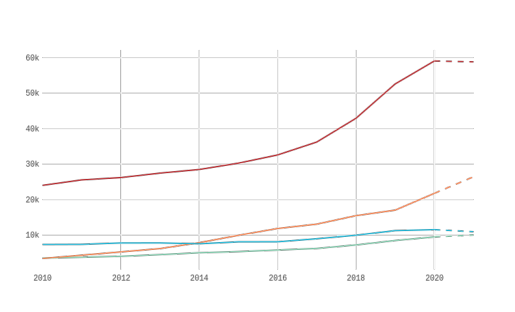

In [48]:
# Example URL containing Plotly graph
url = 'https://cat.eto.tech/?expanded=Summary-metrics%2CCountry-co-authorship%2CTop-ten-cited-articles'

# Send a GET request to retrieve the HTML content
response = requests.get(url)
html_content = response.text

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, 'html.parser')

# Find the SVG tag representing the Plotly graph
graph_div  = data.find(id="Changes-over-time-content")
svg_tag = graph_div.find_all('svg')

# Get the SVG content as a string
svg_content = str(svg_tag[1])

# Convert SVG to PNG using CairoSVG
png_data = cairosvg.svg2png(bytestring=svg_content)

# Create a PIL Image object from the PNG data
image = Image.open(io.BytesIO(png_data))

# Display the image using Matplotlib
plt.imshow(image)
plt.axis('off')
plt.show()